<a href="https://colab.research.google.com/github/manassanant132/02_Maching_Learing_Pipeline/blob/main/Unit7_%E0%B8%81%E0%B8%B2%E0%B8%A3%E0%B8%A7%E0%B8%B4%E0%B9%80%E0%B8%84%E0%B8%A3%E0%B8%B2%E0%B8%B0%E0%B8%AB%E0%B9%8C%E0%B8%9B%E0%B8%A3%E0%B8%B0%E0%B8%AA%E0%B8%B4%E0%B8%97%E0%B8%98%E0%B8%B4%E0%B8%A0%E0%B8%B2%E0%B8%9E_Machine_Learning_Model_%E0%B8%94%E0%B9%89%E0%B8%A7%E0%B8%A2_Learning_Curve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Learning Curve เป็นสิ่งที่แสดงถึงประสิทธิภาพการเรียนรู้ของ Model จาก Training Dataset ซึ่งแกน x ของกราฟจะเป็น Epoch และแกน y จะเป็นประสิทธิภาพของ Model โดยประสิทธิภาพของ Model จะถูกวัดหลังจากการปรับปรุง Weight และ Bias ด้วยข้อมูล 2 ชนิด ได้แก่ "Training Dataset ที่ Model กำลังเรียนรู้" และ "Validation Dataset ที่ไม่เคยถูกใช้สอน Model มาก่อน"

ประสิทธิภาพของ Model จะวัดจาก Loss และ Accuracy โดยยิ่งค่า Loss หรือ Error ของ Model น้อย แสดงว่า Model มีการเรียนรู้ที่ดี แต่สำหรับค่า Accuracy จะเป็นในทางตรงกันข้าม คือยิ่งค่า Accuracy มากแสดงว่า Model มีการเรียนรู้ที่ดี

การวินิจฉัยและแก้ไขปัญหาการเรียนรู้ของ Model อย่างเช่น ปัญหา Underfitting และ Overfitting ได้ เราจะต้องมีความเข้าใจรูปแบบ Learning Curve ที่เกิดขึ้น นอกจากนี้เรายังสามารถพิจารณาจาก Learning Curve ได้ว่า Training Dataset และ Validation Dataset เป็นตัวแทนของ Data ที่เหมาะสมในกระบวนการพัฒนา Model หรือไม่

ในบทความนี้ผู้อ่านจะได้ทำความเข้าใจรูปแบบของ Learning Curve ที่สำคัญได้แก่ Underfit Learning Curve, Overfit Learning Curve, Good Fit Learning Curve รวมทั้งรูปแบบของ Learning Curve ที่แสดงว่า Training Dataset และ Validation Dataset เป็นตัวแทนของ Data ที่ไม่ดีครับ

# Underfit Learning Curve

Learning Curve แบบ Underfitting จะบ่งบอกว่า Model ไม่สามารถเรียนรู้ได้จาก Training Dataset

โดยเราจะจำลองสถานการณ์ของ Model ที่มีปัญหาการเรียนรู้แบบ Underfit ด้วยการพัฒนา Model เพื่อทำ Sentiment Analysis จาก IMDB Dataset ซึ่งเป็นคำวิจารณ์ภาพยนตร์ต่างประเทศ ตามขั้นตอนดังต่อไปนี้

ก่อนอื่นเราจะ Import Library ที่จำเป็นต้องใช้ในการทดลองดังต่อไปนี้

In [1]:
import tensorflow as tf

imdb = tf.keras.datasets.imdb
to_categorical = tf.keras.utils.to_categorical
sequence = tf.keras.preprocessing.sequence

import plotly
import plotly.graph_objs as go
import plotly.express as px

from matplotlib import pyplot

import numpy

from sklearn.datasets import make_circles, make_blobs
from sklearn.model_selection import train_test_split

from pandas import DataFrame
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

Load IMDB Dataset

In [2]:
top_words = 5000
(x_train, y_train), (x_val, y_val) = imdb.load_data(num_words=top_words)
max_words = 500

x_train.shape, y_train.shape, x_val.shape, y_val.shape

17464789/17464789 [==============================] - 0s 0us/step


((25000,), (25000,), (25000,), (25000,))

In [3]:
imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


{'fawn': 34701,
 'tsukino': 52006,
 'nunnery': 52007,
 'sonja': 16816,
 'vani': 63951,
 'woods': 1408,
 'spiders': 16115,
 'hanging': 2345,
 'woody': 2289,
 'trawling': 52008,
 "hold's": 52009,
 'comically': 11307,
 'localized': 40830,
 'disobeying': 30568,
 "'royale": 52010,
 "harpo's": 40831,
 'canet': 52011,
 'aileen': 19313,
 'acurately': 52012,
 "diplomat's": 52013,
 'rickman': 25242,
 'arranged': 6746,
 'rumbustious': 52014,
 'familiarness': 52015,
 "spider'": 52016,
 'hahahah': 68804,
 "wood'": 52017,
 'transvestism': 40833,
 "hangin'": 34702,
 'bringing': 2338,
 'seamier': 40834,
 'wooded': 34703,
 'bravora': 52018,
 'grueling': 16817,
 'wooden': 1636,
 'wednesday': 16818,
 "'prix": 52019,
 'altagracia': 34704,
 'circuitry': 52020,
 'crotch': 11585,
 'busybody': 57766,
 "tart'n'tangy": 52021,
 'burgade': 14129,
 'thrace': 52023,
 "tom's": 11038,
 'snuggles': 52025,
 'francesco': 29114,
 'complainers': 52027,
 'templarios': 52125,
 '272': 40835,
 '273': 52028,
 'zaniacs': 52130,

Concat Train และ Validate Dataset เพื่อคำนวณคำที่ไม่ซ้ำทั้งหมด

In [4]:
x = numpy.concatenate((x_train, x_val), axis=0)

print("Number of words:", len(numpy.unique(numpy.hstack(x))))

Number of words: 4998


ดูความยาวของคำในประโยค

Review length: 
Mean 234.76 words (172.911495)


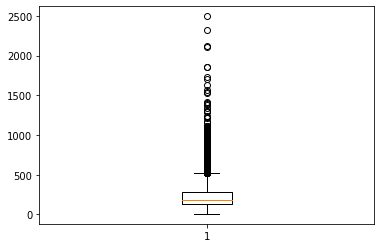

In [5]:
print("Review length: ")
result = [len(st) for st in x]
print("Mean %.2f words (%f)" % (numpy.mean(result), numpy.std(result)))

pyplot.boxplot(result)

pyplot.savefig('review_length.png', dpi = 300)

เติม 0 (ศูนย์) เพื่อทำให้ความยาวของประโยคเท่ากัน (Padding)

In [10]:
x_train = sequence.pad_sequences(x_train, maxlen=max_words)
x_val = sequence.pad_sequences(x_val, maxlen=max_words)

x_train.shape

(25000, 500)

นิยาม Model

In [11]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(4, input_dim=max_words, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 4)                 2004      
                                                                 
 dense_3 (Dense)             (None, 1)                 5         
                                                                 
Total params: 2,009
Trainable params: 2,009
Non-trainable params: 0
_________________________________________________________________


Train Model

In [12]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, batch_size=128, verbose=2)

Epoch 1/200
196/196 - 2s - loss: 31.3366 - accuracy: 0.4970 - val_loss: 1.3615 - val_accuracy: 0.5023 - 2s/epoch - 9ms/step
Epoch 2/200
196/196 - 1s - loss: 1.0672 - accuracy: 0.5011 - val_loss: 0.8800 - val_accuracy: 0.5003 - 716ms/epoch - 4ms/step
Epoch 3/200
196/196 - 1s - loss: 0.7923 - accuracy: 0.4964 - val_loss: 0.7994 - val_accuracy: 0.5000 - 727ms/epoch - 4ms/step
Epoch 4/200
196/196 - 1s - loss: 0.7341 - accuracy: 0.5010 - val_loss: 0.7670 - val_accuracy: 0.5000 - 699ms/epoch - 4ms/step
Epoch 5/200
196/196 - 1s - loss: 0.7102 - accuracy: 0.4976 - val_loss: 0.7539 - val_accuracy: 0.5000 - 713ms/epoch - 4ms/step
Epoch 6/200
196/196 - 1s - loss: 0.7025 - accuracy: 0.5010 - val_loss: 0.7491 - val_accuracy: 0.4998 - 695ms/epoch - 4ms/step
Epoch 7/200
196/196 - 1s - loss: 0.7001 - accuracy: 0.4988 - val_loss: 0.7461 - val_accuracy: 0.4997 - 708ms/epoch - 4ms/step
Epoch 8/200
196/196 - 1s - loss: 0.6983 - accuracy: 0.4970 - val_loss: 0.7423 - val_accuracy: 0.4997 - 695ms/epoch - 4ms

Plot Loss

In [13]:
h1 = go.Scatter(y=history.history['loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='Epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1, filename='Underfit')

Plot Accuracy

In [14]:
h1 = go.Scatter(y=history.history['accuracy'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=history.history['val_accuracy'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='Epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1, filename='Underfit')

จากกราฟ Loss จะเห็นว่าตั้งแต่ Epoch ที่ 1 ค่า Training Loss จะค่อนข้างราบเรียบ ไม่ลดลง และจากกราฟ Accuracy ค่า Training Accuracy จะเหวี่ยงไปมา ไม่มีแนวโน้มจะเพิ่มขึ้น ซึ่งรูปแบบ Learning Curve ดังกล่าว แสดงให้เห็นว่า Model ของเราเกิดปัญหา Underfitting ครับ

# Overfit Learning Curve
Learning Curve แบบ Overfitting จะบ่งบอกว่า Model มีการเรียนรู้ที่ดีเกินไปจาก Training Dataset ซึ่งรวมทั้งรูปแบบของ Noise หรือความผันผวนของ Training Dataset
ซึ่งเราจะจำลองสถานการณ์ของ Model ที่มีปัญหาการเรียนรู้แบบ Overfitting ด้วยการพัฒนา Model เพื่อ Classfify ข้อมูลจำนวน 2 Class โดยมีขั้นตอนดังต่อไปนี้

สร้าง Dataset แบบ 2 Class โดยใช้ Function make_circles ของ Sklearn

In [15]:
x, y =  make_circles(n_samples=500, noise=0.2, random_state=1)

แบ่งข้อมูลสำหรับ Train และ Validate โดยการสุ่มในสัดส่วน 50:50

In [16]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.5, shuffle= True)

x_train.shape, y_train.shape, x_val.shape, y_val.shape

((250, 2), (250,), (250, 2), (250,))

นำ Dataset ส่วนที่ Train มาแปลงเป็น DataFrame โดยเปลี่ยนชนิดข้อมูลใน Column "class" เป็น String เพื่อทำให้สามารถแสดงสีแบบไม่ต่อเนื่องได้ แล้วนำไป Plot

In [17]:
x_train_pd = pd.DataFrame(x_train, columns=['x', 'y'])
y_train_pd = pd.DataFrame(y_train, columns=['class'])

df = pd.concat([x_train_pd, y_train_pd], axis=1)
df["class"] = df["class"].astype(str)

In [18]:
fig = px.scatter(df, x="x", y="y", color="class")
fig.show()

นิยาม Model

In [19]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(60, input_dim=2, activation='relu'))
model.add(tf.keras.layers.Dense(30,  activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Train Model

In [20]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=500, verbose=1)

Epoch 1/500
8/8 [==============================] - 1s 29ms/step - loss: 0.6996 - accuracy: 0.4720 - val_loss: 0.6835 - val_accuracy: 0.5400
Epoch 2/500
8/8 [==============================] - 0s 10ms/step - loss: 0.6933 - accuracy: 0.4960 - val_loss: 0.6851 - val_accuracy: 0.5240
Epoch 3/500
8/8 [==============================] - 0s 8ms/step - loss: 0.6902 - accuracy: 0.5520 - val_loss: 0.6863 - val_accuracy: 0.5480
Epoch 4/500
8/8 [==============================] - 0s 7ms/step - loss: 0.6877 - accuracy: 0.5440 - val_loss: 0.6862 - val_accuracy: 0.5760
Epoch 5/500
8/8 [==============================] - 0s 9ms/step - loss: 0.6855 - accuracy: 0.6000 - val_loss: 0.6874 - val_accuracy: 0.5720
Epoch 6/500
8/8 [==============================] - 0s 6ms/step - loss: 0.6838 - accuracy: 0.6160 - val_loss: 0.6891 - val_accuracy: 0.5120
Epoch 7/500
8/8 [==============================] - 0s 6ms/step - loss: 0.6826 - accuracy: 0.6280 - val_loss: 0.6898 - val_accuracy: 0.5120
Epoch 8/500
8/8 [========

Plot Loss


In [21]:
h1 = go.Scatter(y=history.history['loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='Epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1, filename='Overfit')

Plot Accuracy

In [23]:
h1 = go.Scatter(y=history.history['accuracy'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=history.history['val_accuracy'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='Epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1, filename='Overfit')

ในการวิเคราะห์ปัญหา Overfitting เราจะพิจารณาจากกราฟ Loss เป็นหลัก ซึ่งจากกราฟ Loss ด้านบน พบว่ายิ่งมีการ Train มากขึ้น ค่า Training Loss จะลงอย่างต่อเนื่อง ขณะที่ Validation Loss จะลดลงถึงจุดหนึ่งแล้วหลังจากนั้นกลับมีการเพิ่มค่าขึ้นเรื่อยๆ

# Good Fit Learning Curve
Good Fitting เป็นเป้าหมายในการ Train Model ซึ่งกราฟแบบ Good Fitting จะบ่งบอกว่า Model มีการเรียนรู้ที่ดี เราสามารถนำ Model ไป Predict ข้อมูลที่ไม่เคยพบเห็นได้อย่างแม่นยำ หรือเรียกว่า Model มีความเป็น Generalize ต่อ Data ใหม่ๆ (มี Generalization Error น้อย)

เราจะจำลองสถานการณ์ของ Model แบบ Good Fitting ด้วยการพัฒนา Model เพื่อ Classify ข้อมูลจำนวน 3 Class ตามขั้นตอนดังต่อไปนี้

สร้าง Dataset แบบ 3 Class โดยใช้ Function make_blobs ของ Sklearn

In [24]:
x, y = make_blobs(n_samples=3000, centers=3, n_features=2, cluster_std=2, random_state=2)

แบ่งข้อมูลสำหรับ Train และ Validate ด้วยการสุ่มในสัดส่วน 60:40

In [25]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.4, shuffle= True)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

((1800, 2), (1200, 2), (1800,), (1200,))

นำ Dataset ส่วนที่ Train มาแปลงเป็น DataFrame โดยเปลี่ยนชนิดข้อมูลใน Column "class" เป็น String เพื่อทำให้สามารถแสดงสีแบบไม่ต่อเนื่องได้ แล้วนำไป Plot

In [26]:
x_train_pd = pd.DataFrame(x_train, columns=['x', 'y'])
y_train_pd = pd.DataFrame(y_train, columns=['class'])

df = pd.concat([x_train_pd, y_train_pd], axis=1)
df["class"] = df["class"].astype(str)

In [27]:
fig = px.scatter(df, x="x", y="y", color="class")
fig.show()

เข้ารหัสผลเฉลย แบบ One-Hot Encoding เพื่อที่ว่าเมื่อ Model มีการ Predict ว่าเป็น Class ไหน มันจะให้ค่าความมั่นใจ (Confidence) กลับมาด้วย

In [28]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

นิยาม Model

In [29]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 50)                150       
                                                                 
 dense_8 (Dense)             (None, 3)                 153       
                                                                 
Total params: 303
Trainable params: 303
Non-trainable params: 0
_________________________________________________________________


Train Model

In [30]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, verbose=1)

Epoch 1/200
57/57 [==============================] - 1s 6ms/step - loss: 3.6056 - accuracy: 0.3161 - val_loss: 0.9084 - val_accuracy: 0.5517
Epoch 2/200
57/57 [==============================] - 0s 3ms/step - loss: 0.7551 - accuracy: 0.6433 - val_loss: 0.6944 - val_accuracy: 0.6917
Epoch 3/200
57/57 [==============================] - 0s 3ms/step - loss: 0.6670 - accuracy: 0.7039 - val_loss: 0.6661 - val_accuracy: 0.7025
Epoch 4/200
57/57 [==============================] - 0s 3ms/step - loss: 0.6422 - accuracy: 0.7061 - val_loss: 0.6446 - val_accuracy: 0.7108
Epoch 5/200
57/57 [==============================] - 0s 3ms/step - loss: 0.6231 - accuracy: 0.7217 - val_loss: 0.6263 - val_accuracy: 0.7108
Epoch 6/200
57/57 [==============================] - 0s 3ms/step - loss: 0.6095 - accuracy: 0.7178 - val_loss: 0.6112 - val_accuracy: 0.7250
Epoch 7/200
57/57 [==============================] - 0s 4ms/step - loss: 0.5936 - accuracy: 0.7333 - val_loss: 0.5978 - val_accuracy: 0.7300
Epoch 8/200
5

Plot Loss

In [ ]:
h1 = go.Scatter(y=history.history['loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1, filename='Good Fit')

Plot Accuracy

In [ ]:
h1 = go.Scatter(y=history.history['accuracy'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=history.history['val_accuracy'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='Epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1, filename='Good Fit')

จากกราฟ Loss ด้านบน จะเห็นว่าทั้ง Training Loss และ  Validation Loss มีค่าลดลงอย่างต่อเนื่องจนถึงจุดหนึ่งมันจะคงที่ ซึ่งกราฟทั้ง 2 เส้น จะมี Gapระหว่างกันน้อยมาก โดยรูปแบบ Learning Curve ดังกล่าว แสดงว่าเป็น Model แบบ Good Fitting หรือเป็น Model ที่มีการเรียนรู้ที่ดี สามารถนำไป Predict ข้อมูลที่ไม่เคยพบเห็นมาก่อนได้อย่างแม่นยำ

# Unrepresentative Train Dataset

นอกจากเราจะใช้ Learning Curve ในการพิจารณาว่า Model มีประสิทธิภาพหรือไม่แล้ว เรายังสามารถพิจารณาจากรูปแบบของ Learning Curve ได้ว่า Dataset (Train และ Validate) ของเราเป็นตัวแทนของข้อมูลที่ดีหรือไม่

โดยจะจำลองสถานการณ์เมื่อ Trainning Dataset ไม่สามารถเป็นตัวแทนของข้อมูลที่ดีได้ ดังขั้นตอนต่อไปนี้

สร้าง Dataset แบบ 3 Class โดยใช้ Function make_blobs ของ Sklearn

In [ ]:
x, y = make_blobs(n_samples=100, centers=3, n_features=2, cluster_std=2, random_state=2)

แบ่งข้อมูลสำหรับ Train และ Validate ด้วยการสุ่มในสัดส่วน 50:50

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.5, shuffle= True)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

นำ Dataset ส่วนที่ Train มาแปลงเป็น DataFrame โดยเปลี่ยนชนิดข้อมูลใน Column "class" เป็น String เพื่อทำให้สามารถแสดงสีแบบไม่ต่อเนื่องได้ แล้วนำไป Plot

In [ ]:
x_train_pd = pd.DataFrame(x_train, columns=['x', 'y'])
y_train_pd = pd.DataFrame(y_train, columns=['class'])

df = pd.concat([x_train_pd, y_train_pd], axis=1)
df["class"] = df["class"].astype(str)

In [ ]:
fig = px.scatter(df, x="x", y="y", color="class")
fig.show()

เข้ารหัสผลเฉลย แบบ One-Hot Encoding เพื่อที่ว่าเมื่อ Model มีการ Predict ว่าเป็น Class ไหน มันจะให้ค่าความมั่นใจ (Confidence) กลับมาด้วย

In [ ]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

นิยาม Model

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Train Model

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, verbose=1)

Plot Loss

In [ ]:
h1 = go.Scatter(y=history.history['loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='Epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1, filename='Unrepresentative Train Dataset')

Plot Accuracy

In [ ]:
h1 = go.Scatter(y=history.history['accuracy'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=history.history['val_accuracy'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='Epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1, filename='Unrepresentative Train Dataset')

จากกราฟด้านบนพบว่าเมื่อมีการ Train Model มากขึ้น ค่า Loss จะมีแนวโน้มลดลง และ Accuracy มีแนวโน้มเพิ่มขึ้น แต่จะมี Gap ระหว่าง Training Loss กับ Validation Loss รวมทั้ง Gap ระหว่าง Training Accuracy กับ Validation Accuracy สูง ซึ่งแสดงว่าเรามี Training Dataset น้อยไป ไม่เพียงพอในการ Train Model ครับ

#Unrepresentative Validation Dataset
เราจะจำลองสถานการณ์ในกรณีที่ Validation Dataset ที่ไม่สามารถเป็นตัวแทนของข้อมูลที่ดี ดังต่อไปนี้

สถานการณ์ที่ 1 Validation Dataset น้อย และไม่สามารถเป็นตัวแทนของ Validation Dataset ได้

สถานการณ์ที่ 2 Validation Dataset น้อย และง่ายเกินไป

สถานการณ์ที่ 1 (Validation Dataset น้อย และไม่สามารถเป็นตัวแทนของ Validation Dataset ได้) มีขั้นตอนการทดลองดังต่อไปนี้



In [ ]:
x, y = make_blobs(n_samples=500, centers=3, n_features=2, cluster_std=10, random_state=2)


แบ่งข้อมูลสำหรับ Train และ Validate ด้วยการสุ่มในสัดส่วน 95:5

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.05, shuffle= True)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

นำ Dataset ส่วนที่ Train มาแปลงเป็น DataFrame โดยเปลี่ยนชนิดข้อมูลใน Column "class" เป็น String เพื่อทำให้สามารถแสดงสีแบบไม่ต่อเนื่องได้ แล้วนำไป Plot

In [ ]:
x_train_pd = pd.DataFrame(x_train, columns=['x', 'y'])
y_train_pd = pd.DataFrame(y_train, columns=['class'])

df = pd.concat([x_train_pd, y_train_pd], axis=1)
df["class"] = df["class"].astype(str)

In [ ]:
fig = px.scatter(df, x="x", y="y", color="class")
fig.show()

เข้ารหัสผลเฉลย แบบ One-Hot Encoding เพื่อที่ว่าเมื่อ Model มีการ Predict ว่าเป็น Class ไหน มันจะให้ค่าความมั่นใจ (Confidence) กลับมาด้วย

In [ ]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

นิยาม Model

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Train Model

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, verbose=1)

Plot Loss

In [ ]:
h1 = go.Scatter(y=history.history['loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='Epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1, filename='Unrepresentative Validation Dataset')

Plot Accuracy

In [ ]:
h1 = go.Scatter(y=history.history['accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=history.history['val_accuracy'], 
                    mode="lines", line=dict(
                    width=2,
                    color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='Epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1, filename='Unrepresentative Validation Dataset')

ในกรณีที่ Validation Dataset น้อย และไม่สามารถเป็นตัวแทนของ Validation Dataset ได้ เราจะเห็นค่า Training Loss ค่อยๆ ลดลงแบบเดียวกับในกรณี Good Fitting แต่ Validation Loss จะแกว่งไปมาเหมือนการสุ่มอยู่รอบๆ กราฟ Training Loss เช่นเดียวกันกับที่เมื่อพิจารณาจากกราฟ Accuracy จะพบว่าค่า Validation Accuracy จะแกว่งไปมาเหมือนการสุ่มอยู่รอบๆ กราฟ Training Accuracy

สถานการณ์ที่ 2 (Validation Dataset น้อย และง่ายเกินไป) มีขั้นตอนการทดลองดังต่อไปนี้

สร้าง Dataset แบบ 3 Class โดยใช้ Function make_blobs ของ Sklearn

In [ ]:
x, y = make_blobs(n_samples=400, centers=3, n_features=2, cluster_std=2, random_state=2)

แบ่งข้อมูลสำหรับ Train และ Validate ด้วยการสุ่มในสัดส่วน 97:3

In [ ]:
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size=0.03, shuffle= True)

x_train.shape, x_val.shape, y_train.shape, y_val.shape

นำ Dataset ส่วนที่ Train มาแปลงเป็น DataFrame โดยเปลี่ยนชนิดข้อมูลใน Column "class" เป็น String เพื่อทำให้สามารถแสดงสีแบบไม่ต่อเนื่องได้ แล้วนำไป Plot

In [ ]:
x_train_pd = pd.DataFrame(x_train, columns=['x', 'y'])
y_train_pd = pd.DataFrame(y_train, columns=['class'])

df = pd.concat([x_train_pd, y_train_pd], axis=1)
df["class"] = df["class"].astype(str)

In [ ]:
fig = px.scatter(df, x="x", y="y", color="class")
fig.show()

เข้ารหัสผลเฉลย แบบ One-Hot Encoding เพื่อที่ว่าเมื่อ Model มีการ Predict ว่าเป็น Class ไหน มันจะให้ค่าความมั่นใจ (Confidence) กลับมาด้วย

In [ ]:
y_train = to_categorical(y_train)
y_val = to_categorical(y_val)

นิยาม Model

In [ ]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(50, input_dim=2, activation='relu', kernel_initializer='he_uniform'))
model.add(tf.keras.layers.Dense(3, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Train Model

In [ ]:
history = model.fit(x_train, y_train, validation_data=(x_val, y_val), epochs=200, verbose=1)

Plot Loss

In [ ]:
h1 = go.Scatter(y=history.history['loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                    name="loss"
                   )
h2 = go.Scatter(y=history.history['val_loss'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                    name="val_loss"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Loss',
                   xaxis=dict(title='Epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1, filename='Unrepresentative Validation Dataset')

Plot Accuracy

In [ ]:
h1 = go.Scatter(y=history.history['accuracy'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='blue'),
                    name="acc"
                   )
h2 = go.Scatter(y=history.history['val_accuracy'], 
                    mode="lines",
                    line=dict(
                        width=2,
                        color='red'),
                    name="val_acc"
                   )

data = [h1,h2]
layout1 = go.Layout(title='Accuracy',
                   xaxis=dict(title='Epochs'),
                   yaxis=dict(title=''))
fig1 = go.Figure(data = data, layout=layout1)
plotly.offline.iplot(fig1, filename='Unrepresentative Validation Dataset')

ในกรณีที่ Validation Dataset น้อย และง่ายจนเกินไป เราจะเห็นค่า Training Loss และ Validate Loss ลดลง โดยที่ค่า Validate Loss จะต่ำกว่า Training Lossในทางตรงกันข้าม เมื่อพิจารณาจากกราฟ Accuracy จะพบว่าค่า Training Accuracy และ Validate Accuracy จะเพิ่มขึ้น โดยที่ค่า Validate Accuracy จะสูงกว่า Training Accuracy ครับ